# HW1 MingxuanJiang 5588030

Collarborated with HaoChen and JingyiLi

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Question 1

if using the formula: r = 2*(np.log(1+BEY/2))

In [2]:
# the first row of the matrix means the par bond maturities
# the second row of the matrix means the BEY yields
# assume during the first year, the BEY yields of t=0,0.5,1 are equal, not starting at 0
def GetSpotRate(spot, matrix):
    ParBondMaturities = matrix[0]
    BEYYields = matrix[1]/100 #%
    # interp first
    LinearBEY = np.interp(spot, ParBondMaturities, BEYYields)
    SpotRate = 2*np.log(1+LinearBEY/2)
    return SpotRate


In [3]:
# test
matrix = np.array([[1,2,3],[1,2,3]])
print(matrix)
GetSpotRate(2.5,matrix)

[[1 2 3]
 [1 2 3]]


0.02484503999711422

if using the forluma: BEY = 2*(exp(r/2)-1)

In [13]:
# the first row of the matrix means the par bond maturities
# the second row of the matrix means the BEY yields
# assume during the first year, the BEY yields of t=0,0.5,1 are equal, not starting at 0
def GetSpotRate2(spot, matrix):
    ParBondMaturities = matrix[0]
    BEYYields = matrix[1]/100 #%
    # interp first
    LinearBEY = np.interp(spot, ParBondMaturities, BEYYields)
    SpotRate = 2*(np.exp(LinearBEY/2)-1)
    return SpotRate


## Question 2

In [4]:
times = np.arange(0,9.1,0.5)
print('times',times)
coupons = 0.5*0.025*100*np.ones((1,19))
# no coupons at time 0
coupons[0,0] = 0
principal_pmts = np.zeros((1,19))
principal_pmts[0,-1] = 100
# get bond cash flows
bondcashflows = coupons + principal_pmts
print('cashflows',bondcashflows)

times [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9. ]
cashflows [[  0.     1.25   1.25   1.25   1.25   1.25   1.25   1.25   1.25   1.25
    1.25   1.25   1.25   1.25   1.25   1.25   1.25   1.25 101.25]]


In [5]:
# estimate the price
zcb = np.zeros((1,19))
inputs = np.array([[1,2,3,5,7,10],[0.75,1.08,1.50,2.57,3.10,3.90]])
for i in range(np.shape(zcb)[1]):
    zcb[0][i] = np.exp(-GetSpotRate(i/2,inputs)*times[i])
npv = np.inner(zcb, bondcashflows)
print('Price:',round(npv[0][0],2))


Price: 92.17


## Question 3

In [6]:
# ThisYear means the end of the year like Dec 31 2017 means 2017
# CouponRates means the annual coupon rates
def GetMarketPrice(ThisYear, inputs, CouponRates):
    BondYear = 10 + 2017 - ThisYear
    times = np.arange(0, BondYear+0.1, 0.5)
    coupons = 0.5*CouponRates*100*np.ones((1,2*BondYear+1))
    coupons[0,0] = 0
    principal_pmts = np.zeros((1,2*BondYear+1))
    principal_pmts[0,-1] = 100
    # get bond cash flows
    bondcashflows = coupons + principal_pmts
    # estimate the price
    zcb = np.zeros((1,2*BondYear+1))
    for i in range(np.shape(zcb)[1]):
        zcb[0][i] = np.exp(-GetSpotRate(i/2,inputs)*times[i])
    npv = np.inner(zcb, bondcashflows)
    return npv[0,0]

In [7]:
inputs2017 = np.array([[1,2,3,5,7,10],[0.88,1.88,1.90,2.5,3.1,4.0]])
inputs2018 = np.array([[1,2,3,5,7,10],[1.75,2.01,2.40,2.60,3.25,3.80]])
inputs2019 = np.array([[1,2,3,5,7,10],[2.75,2.90,2.80,2.70,3.45,3.70]])
inputs2020 = np.array([[1,2,3,5,7,10],[3.75,3.75,2.90,2.80,3.55,3.50]])
print('Market price in year 2017:',round(GetMarketPrice(2017, inputs2017, 0.04),2))
print('Market price in year 2018:',round(GetMarketPrice(2018, inputs2018, 0.04),2))
print('Market price in year 2019:',round(GetMarketPrice(2019, inputs2019, 0.04),2))
print('Market price in year 2020:',round(GetMarketPrice(2020, inputs2020, 0.04),2))

Market price in year 2017: 101.66
Market price in year 2018: 103.84
Market price in year 2019: 103.74
Market price in year 2020: 103.11


## Question 4

In [8]:
# define a function of estimat the market price of the bond
def GetTablePrice(CouponRates, y):
    times = np.arange(0,10.1,0.5)
    coupons = 0.5*CouponRates*100*np.ones((1,21))
    coupons[0,0] = 0
    principal_pmts = np.zeros((1,21))
    principal_pmts[0,-1] = 100
    # get bond cash flows
    bondcashflows = coupons + principal_pmts
    # estimate the price
    r = 2*np.log(1+y/2)
    zcb = np.exp(-r*times)
    npv = np.inner(zcb, bondcashflows)
    return npv[0]


In [9]:
# yield from 0% to 10% in crements of 0.5%
Yield = np.arange(0,10.1*0.01,0.005)
BondPrice = []
for i in range(len(Yield)):
    BondPrice.append(GetTablePrice(0.05, Yield[i]))
    print('Yield:',Yield[i],', Bond Price:',BondPrice[i])

Yield: 0.0 , Bond Price: 150.0
Yield: 0.005 , Bond Price: 143.84009863855425
Yield: 0.01 , Bond Price: 137.97483829333993
Yield: 0.015 , Bond Price: 132.38903446397484
Yield: 0.02 , Bond Price: 127.06832944940565
Yield: 0.025 , Bond Price: 121.99914516778209
Yield: 0.03 , Bond Price: 117.1686387850821
Yield: 0.035 , Bond Price: 112.56466097856256
Yield: 0.04 , Bond Price: 108.17571667229853
Yield: 0.045 , Bond Price: 103.99092809249406
Yield: 0.05 , Bond Price: 100.00000000000013
Yield: 0.055 , Bond Price: 96.19318696655597
Yield: 0.06 , Bond Price: 92.56126256977221
Yield: 0.065 , Bond Price: 89.09549038979935
Yield: 0.07 , Bond Price: 85.78759669804782
Yield: 0.075 , Bond Price: 82.62974473523889
Yield: 0.08 , Bond Price: 79.61451048254843
Yield: 0.085 , Bond Price: 76.73485983564517
Yield: 0.09 , Bond Price: 73.98412709709268
Yield: 0.095 , Bond Price: 71.35599470786127
Yield: 0.1 , Bond Price: 68.84447414364999


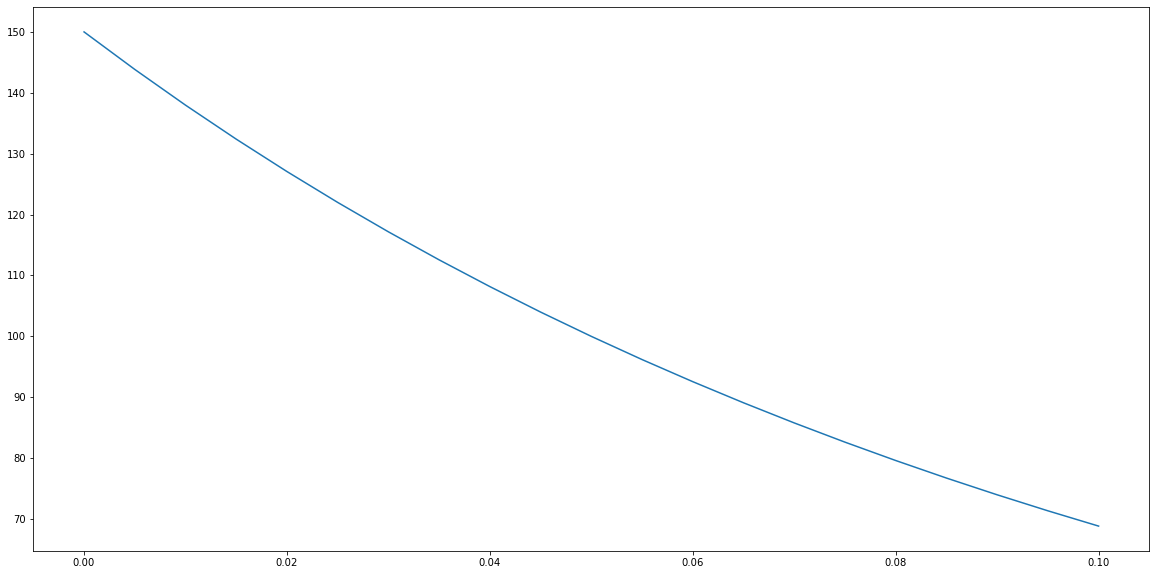

In [10]:
plt.figure(figsize = (20,10))
plt.plot(Yield,BondPrice)
plt.show()

## Question 5

In [11]:
# the first row of the matrix means the par bond maturities
# the second row of the matrix means the BEY yields
def GetSpotRateMod(matrix, SpotYear):
    # total time like 0, 0.5, ...
    times = np.arange(0,SpotYear+.1,0.5)
    ParBondMaturities = matrix[0]
    BEYYields = matrix[1]/100 # use %
    Spotrate = 2*np.log(1+BEYYields/2)
    SpotRate = []
    ZCB = []
    ForwardRate = []
    for i in range(len(times)):
        SpotRate.append(np.interp(times[i], ParBondMaturities, Spotrate))
        ZCB.append(np.exp(-SpotRate[i]*times[i]))
    for i in range(1,len(times)):
        ForwardRate.append(-np.log(ZCB[i]/ZCB[i-1])/0.5)
    
    return [SpotRate, ZCB, ForwardRate]

In [12]:
# test
matrix = np.array([[1,2,3],[1,2,3]])
print('Spot Rate',GetSpotRateMod(matrix, 3)[0])
print('ZCB',GetSpotRateMod(matrix, 3)[1])
print('Forward Rate',GetSpotRateMod(matrix, 3)[2])
# begin with year 0 and then year 0.5, etc.

Spot Rate [0.009975083022077936, 0.009975083022077936, 0.009975083022077936, 0.01493787236420706, 0.019900661706336184, 0.02483894334691865, 0.029777224987501117]
ZCB [1.0, 0.9950248756218907, 0.9900745031063589, 0.9778423594983211, 0.9609803444828162, 0.9397913857820476, 0.9145421925178718]
Forward Rate [0.009975083022077879, 0.009975083022078102, 0.024863451048465296, 0.03478902973272361, 0.04459206990924856, 0.054468633190413285]
